# 0.0. IMPORTS

In [1]:
import sys
import psycopg2

import pandas     as pd
import numpy      as np
import seaborn    as sns
import scikitplot as skplt


from IPython.core.display  import HTML
from matplotlib            import pyplot          as plt
from sklearn               import preprocessing   as pp
from sklearn               import model_selection as ms
from sklearn               import ensemble        as en
from sklearn               import neighbors       as nh
from sklearn               import linear_model    as lm

## 0.1. Aux Functions

In [2]:
# jupyter design
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    %config InlineBackend.figure_format = 'retina'

    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = [10, 5]
    plt.rcParams['font.size'] = 24

#     display(HTML('<style>.container { width:100% !important; }</style>'))
#     pd.options.display.max_columns = None
#     pd.options.display.max_rows = None
#     pd.options.display.float_format = '{:,.4f}'.format
#     pd.set_option('display.expand_frame_repr', False)
#     pd.set_option('display.max_columns', None)
#     pd.set_option('display.max_rows', None)

    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 0.2. Data collection

In [3]:
# connection = psycopg2.connect( user = 'member',
#                                password = 'cdspa',
#                                host = 'comunidade-ds-postgres.c50pcakiuwi3.us-east-1.rds.amazonaws.com',
#                                port = '5432',
#                                database = 'comunidadedsdb' )

# cursor = connection.cursor()

# query = """ SELECT *
#             FROM pa004.users
#             LEFT JOIN pa004.insurance on ( users.id = insurance.id )
#             LEFT JOIN pa004.vehicle on ( users.id = vehicle.id ) """

# cursor.execute( query )

# table = cursor.fetchall()

# outputquery = 'copy ({0}) to stdout with csv header'.format( query )

# with open( 'dataset.csv', 'w' ) as f:
#     cursor.copy_expert( outputquery, f )

# cursor.close()
# connection.close()

In [4]:
df_raw = pd.read_csv( 'data/train_dataset.csv' )
df_raw = df_raw.drop( df_raw.columns[[ 5, 10 ]], axis=1 )

# 1.0. DATA DESCRIPTION

In [5]:
df1 = df_raw.copy()

## 1.1. Data Dimensions

In [6]:
print( 'Number of rows: {}'.format( df1.shape[0] ) )
print( 'Number of columns: {}'.format( df1.shape[1] ) )

Number of rows: 381109
Number of columns: 12


## 1.2. Data types

In [7]:
df1.dtypes

id                       int64
gender                  object
age                      int64
region_code              int64
policy_sales_channel     int64
previously_insured       int64
annual_premium           int64
vintage                  int64
response                 int64
driving_license          int64
vehicle_age             object
vehicle_damage          object
dtype: object

## 1.3. NA check

In [8]:
df1.isna().sum()

id                      0
gender                  0
age                     0
region_code             0
policy_sales_channel    0
previously_insured      0
annual_premium          0
vintage                 0
response                0
driving_license         0
vehicle_age             0
vehicle_damage          0
dtype: int64

## 1.4. Descriptive Statistics

In [9]:
df_num = df1.select_dtypes( include=[ 'int64'] )

### 1.4.1 Numerical attributes

In [10]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# central tendency - mean, median
ct1 = pd.DataFrame( df_num.apply( lambda x: np.mean( x ) ) ).T
ct2 = pd.DataFrame( df_num.apply( lambda x: np.median( x ) ) ).T

# dispersion metrics - min, max, range, std, skewness, kurtosis
dm1 = pd.DataFrame( df_num.apply( lambda x: np.min( x ) ) ).T
dm2 = pd.DataFrame( df_num.apply( lambda x: np.max( x ) ) ).T
dm3 = pd.DataFrame( df_num.apply( lambda x: np.max( x ) - np.min( x ) ) ).T
dm4 = pd.DataFrame( df_num.apply( lambda x: np.std( x ) ) ).T
dm5 = pd.DataFrame( df_num.apply( lambda x: x.skew() ) ).T
dm6 = pd.DataFrame( df_num.apply( lambda x: x.kurtosis() ) ).T

# concat
df_description = pd.concat( [ dm1, dm2, dm3, ct1, ct2, dm4, dm5, dm6 ] ).T
df_description.columns = ( 'min', 'max', 'range', 'mean', 'median', 'std', 'skewness', 'kurtosis' )
df_description

,min,max,range,mean,median,std,skewness,kurtosis
id,1.000,381109.000,381108.000,190555.000,190555.000,110016.692,-0.000,-1.200
age,20.000,85.000,65.000,38.823,36.000,15.512,0.673,-0.566
region_code,0.000,52.000,52.000,26.389,28.000,13.230,-0.115,-0.868
policy_sales_channel,1.000,163.000,162.000,112.034,133.000,54.204,-0.900,-0.971
previously_insured,0.000,1.000,1.000,0.458,0.000,0.498,0.168,-1.972
annual_premium,2630.000,540165.000,537535.000,30564.390,31669.000,17213.132,1.766,34.005
vintage,10.000,299.000,289.000,154.347,154.000,83.671,0.003,-1.201
response,0.000,1.000,1.000,0.123,0.000,0.328,2.302,3.299
driving_license,0.000,1.000,1.000,0.998,1.000,0.046,-21.595,464.354


# 2.0. FEATURE ENGINEERING

In [11]:
df2 = df1.copy()

In [12]:
# vehicle age
df2['vehicle_age'] = df2['vehicle_age'].apply( lambda x: 'below_1_year' if x == '< 1 Year' else 
                                                         'between_1_2_years' if x == '1-2 Year' else 'over_2_years' )

# vehicle damage
df2['vehicle_damage'] = df2['vehicle_damage'].apply( lambda x: 1 if x == 'Yes' else 0 )

# 3.0. DATA FILTERING

In [13]:
df3 = df2.copy()

# 4.0. EXPLORATORY DATA ANALYSIS

In [14]:
df4 = df3.copy()

## 4.1. Univarieted analysis

### 4.1.1. gender

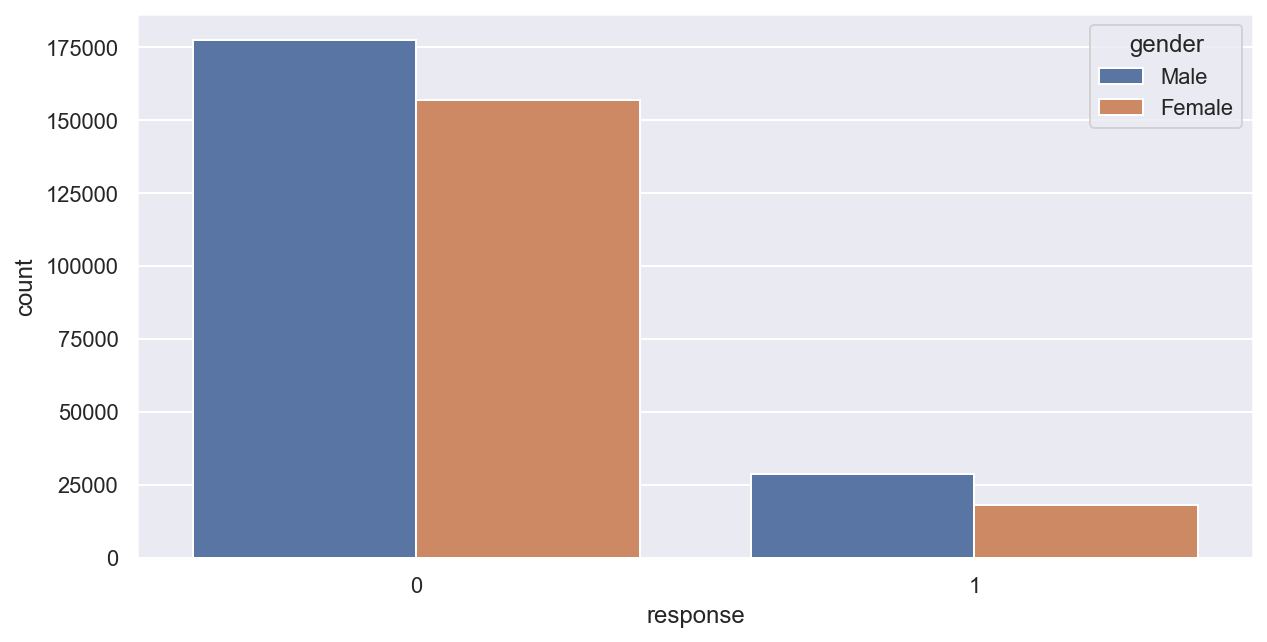

In [15]:
aux = df4[['gender','response']].value_counts().reset_index()
aux.columns = ['gender','response','count']
sns.barplot( x = 'response', y = 'count', hue = 'gender', data=aux );

### 4.1.2. age

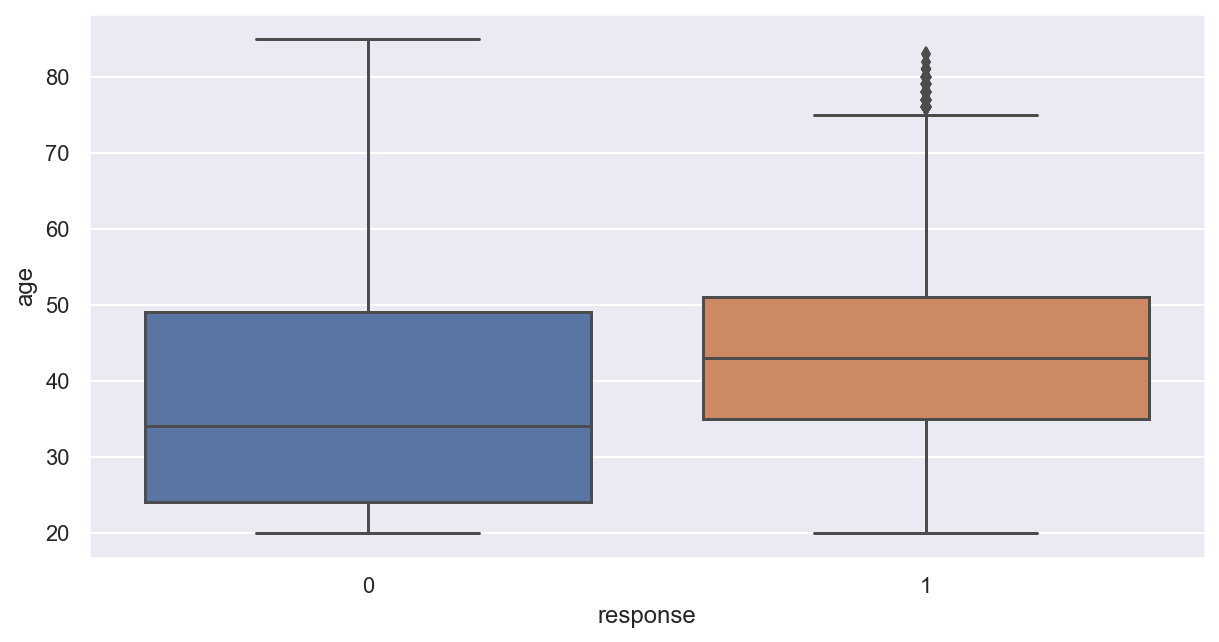

In [16]:
sns.boxplot( x = 'response', y = 'age', data=df4 );

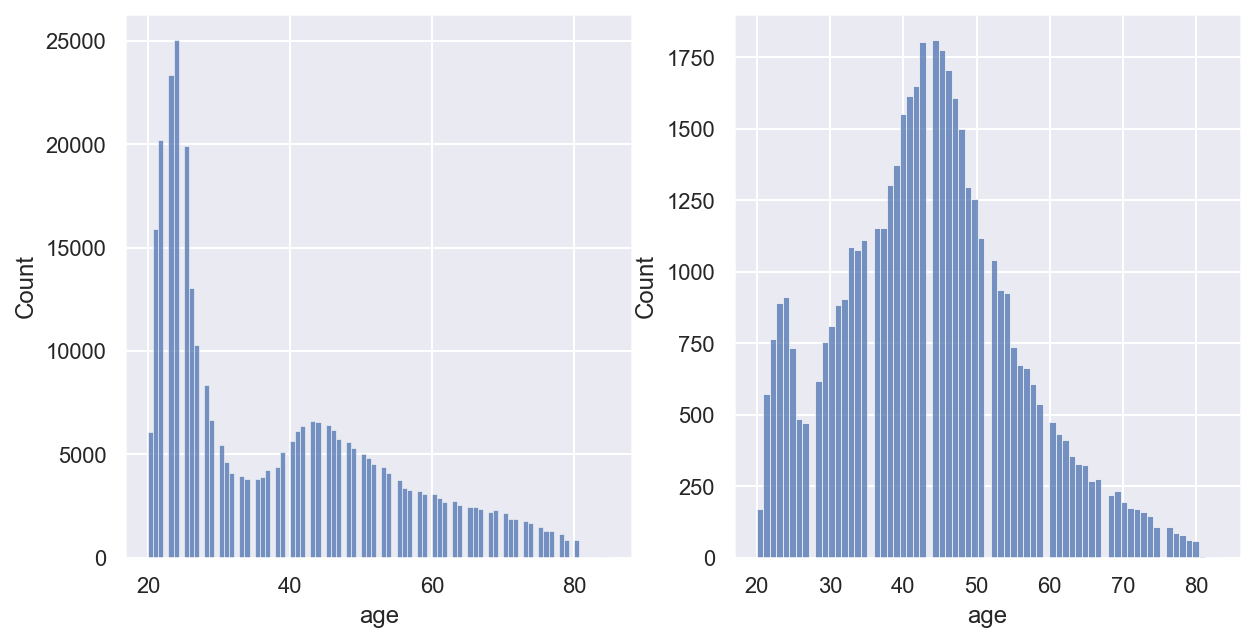

In [17]:
plt.subplot( 1, 2, 1 )
aux0 = df4.loc[ df4['response'] == 0, 'age' ]
sns.histplot( aux0 );

plt.subplot( 1, 2, 2 )
aux1 = df4.loc[ df4['response'] == 1, 'age' ]
sns.histplot( aux1 );

### 4.1.3. region code

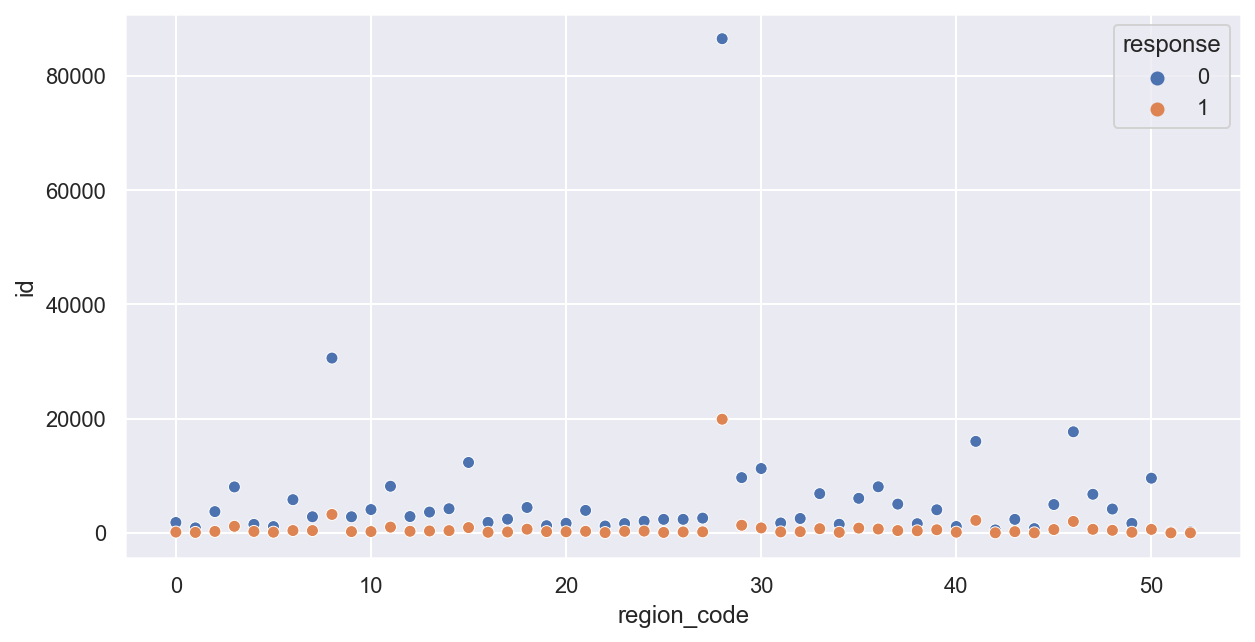

In [18]:
aux = df4[['id','region_code','response']].groupby( ['region_code','response'] ).count().reset_index()
sns.scatterplot( x = 'region_code', y='id', hue='response', data=aux );

### 4.1.4. policy sales channel

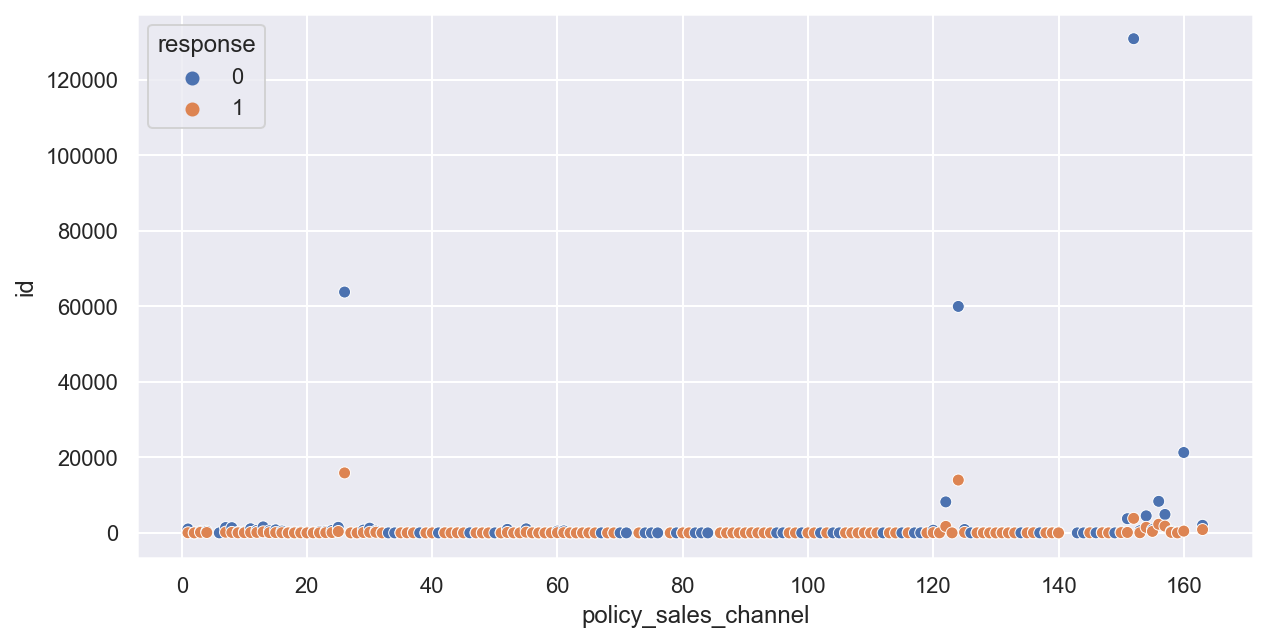

In [19]:
aux = df4[['id','policy_sales_channel','response']].groupby( ['policy_sales_channel','response'] ).count().reset_index()
sns.scatterplot( x='policy_sales_channel', y='id', hue='response', data=aux );

### 4.1.5. annual premium

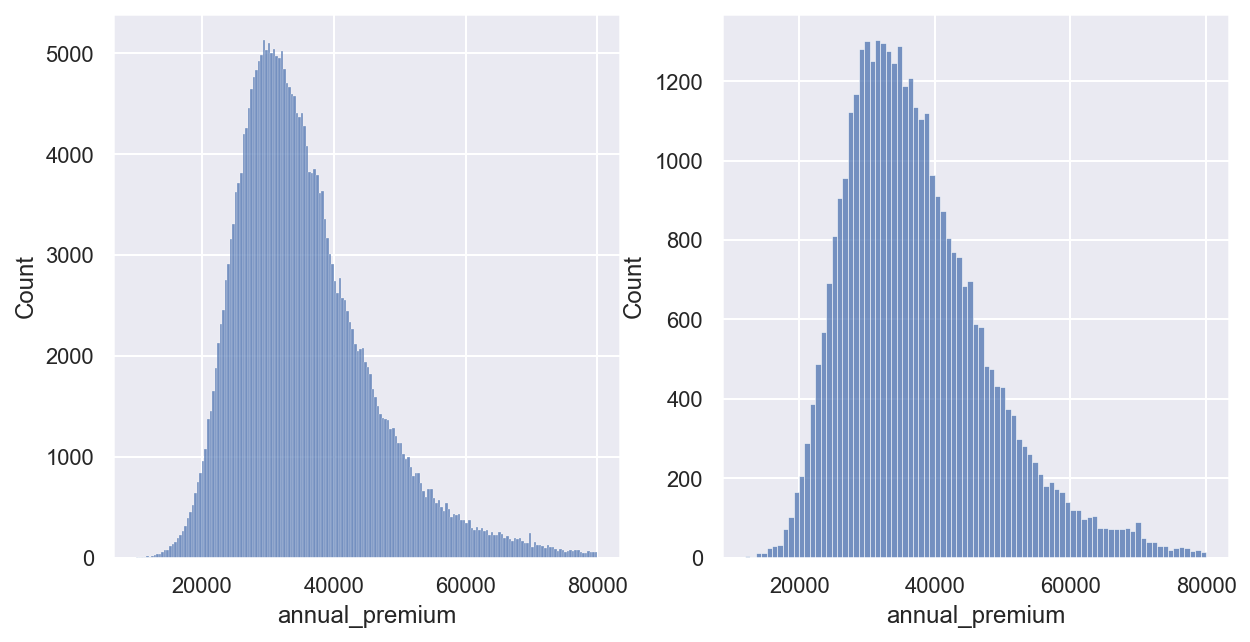

In [20]:
aux = df4[(df4['annual_premium'] > 10000) & (df4['annual_premium'] < 80000)]

plt.subplot( 1, 2, 1 )
aux0 = aux.loc[df4['response'] == 0, 'annual_premium']
sns.histplot( aux0 );

plt.subplot( 1, 2, 2 )
aux1 = aux.loc[df4['response'] == 1, 'annual_premium']
sns.histplot( aux1 );

### 4.1.6. vintage

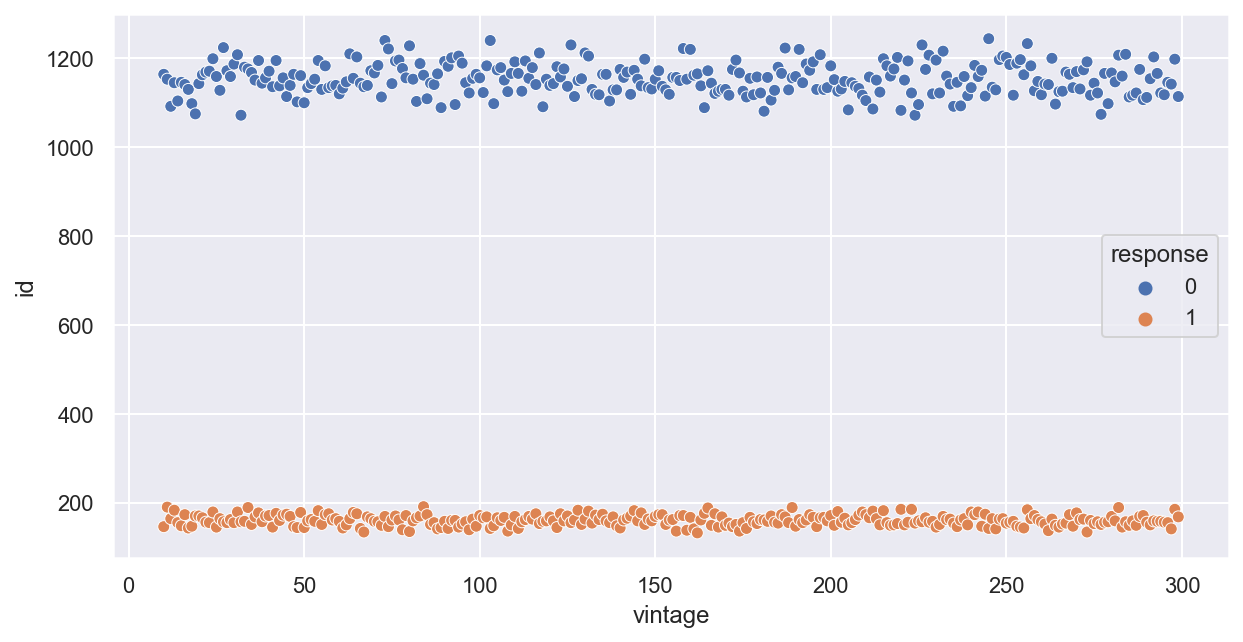

In [21]:
aux = df4[['id','vintage','response']].groupby(['vintage','response']).count().reset_index()
sns.scatterplot( x='vintage', y='id', hue='response', data=aux );

### 4.1.8. driving license

In [22]:
df4[['id','driving_license','response']].groupby(['driving_license','response']).count().reset_index()

,driving_license,response,id
0,0,0,771
1,0,1,41
2,1,0,333628
3,1,1,46669


### 4.1.9. vehicle age

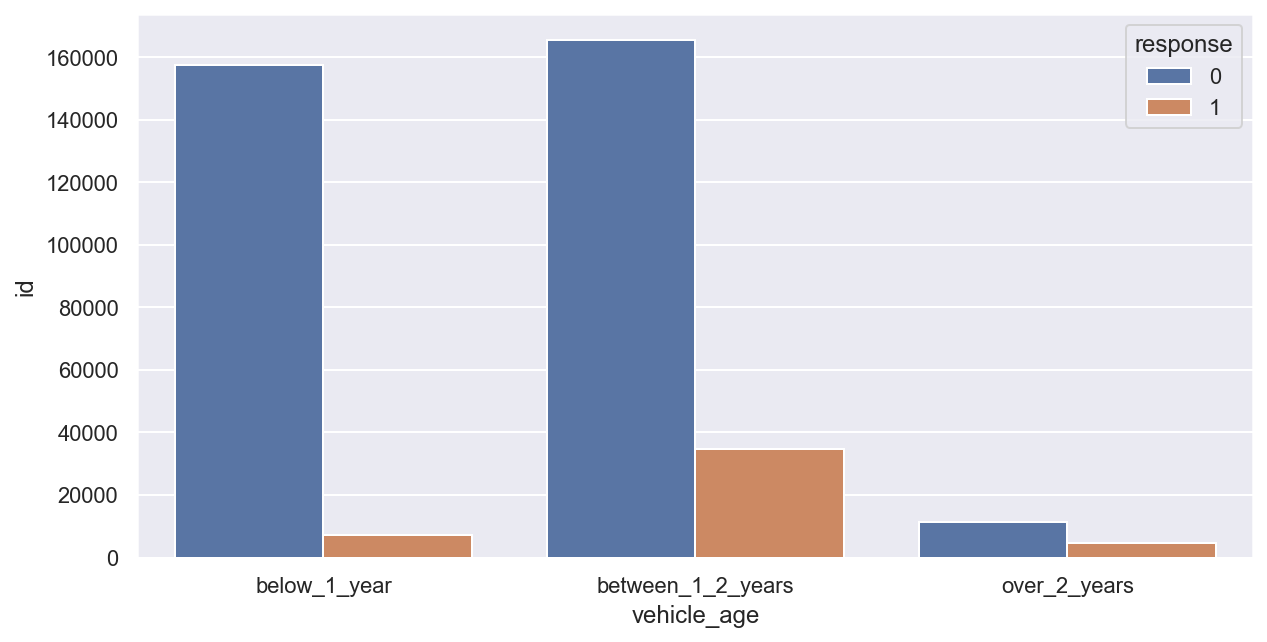

In [23]:
aux = df4[['id','vehicle_age','response']].groupby(['vehicle_age','response']).count().reset_index()
sns.barplot( x='vehicle_age', y='id', hue='response', data=aux );

### 4.1.10. vehicle damage

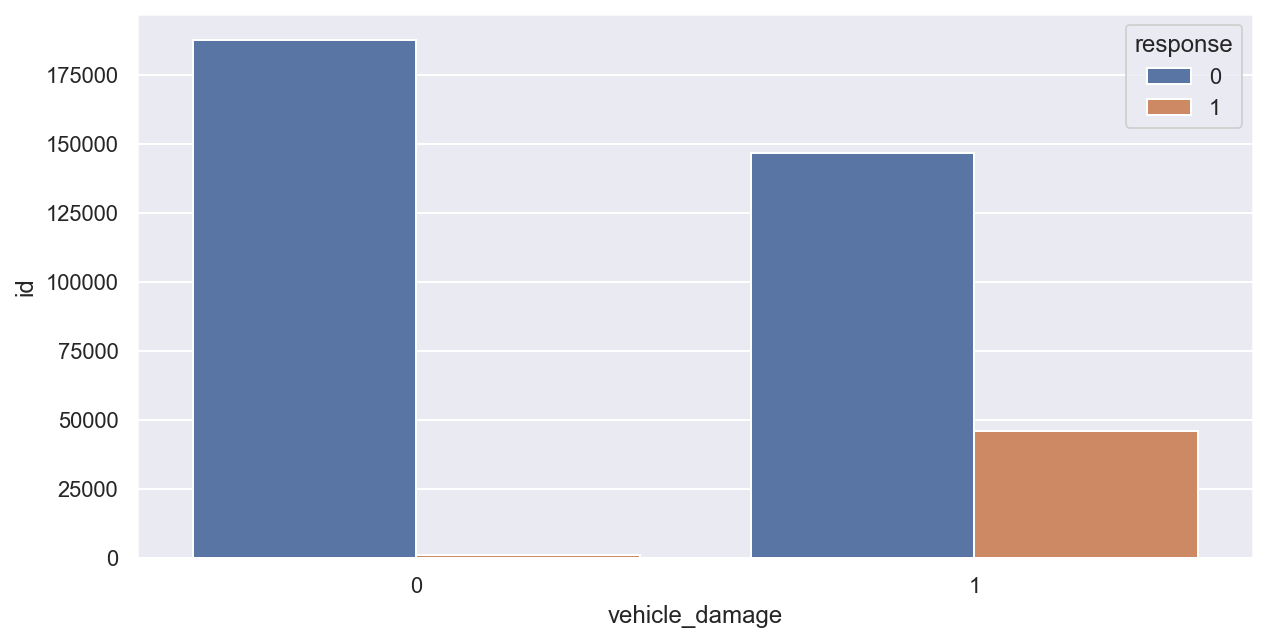

In [24]:
aux = df4[['id','vehicle_damage','response']].groupby( ['vehicle_damage','response'] ).count().reset_index()
sns.barplot( x='vehicle_damage', y='id', hue='response', data=aux );

## 4.2. Bivarieted analysis

**Hypothesis list:**

**H1**:

**H2**: 

**H3**:

**H4**:

**H5**:

## 4.3. Multivarieted analysis

In [25]:
num_attributes = df4.drop( ['id','gender','vehicle_age'], axis=1 )

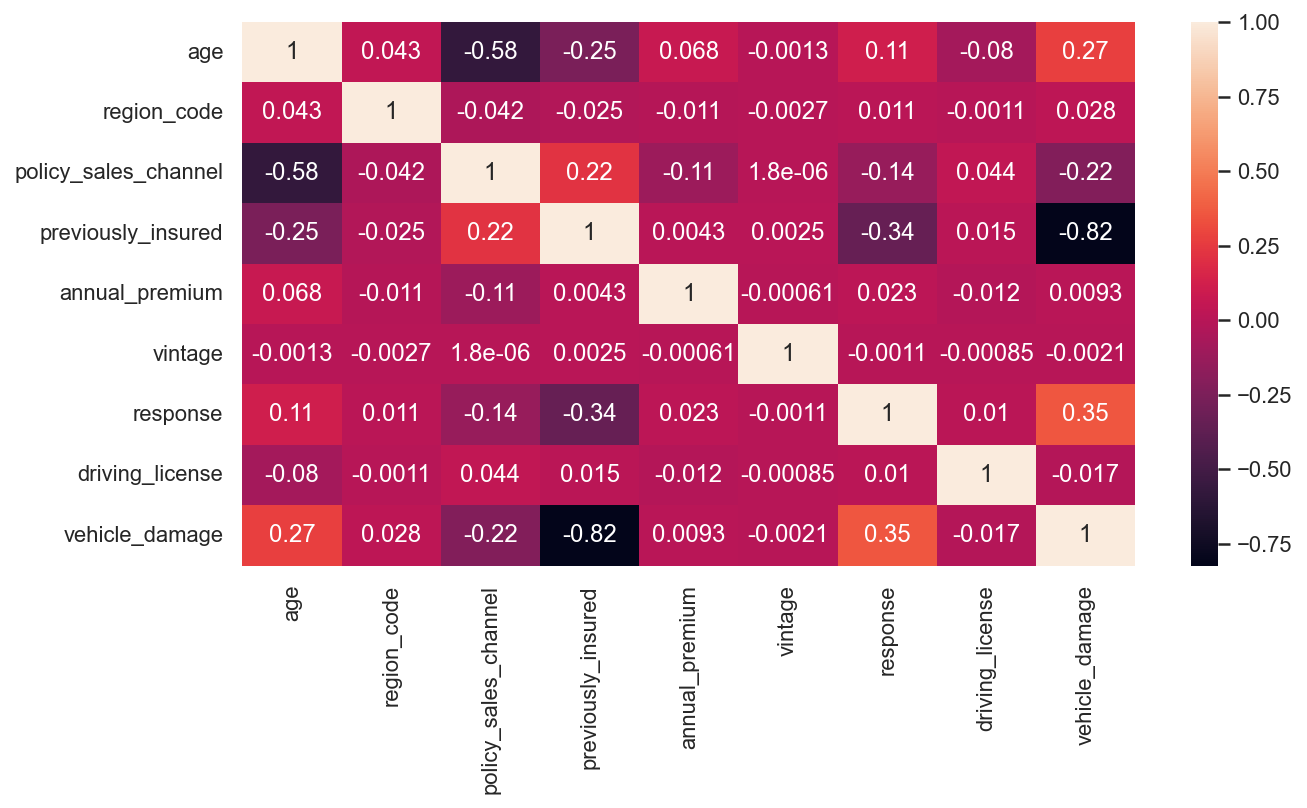

In [26]:
correlation = num_attributes.corr( method='pearson' )
sns.heatmap( correlation, annot=True );

# 5.0. DATA PREPARATION

In [27]:
# Train and validation split

X_general = df4.drop( 'response', axis=1 )
Y_general = df4['response']

x_train, x_val, y_train, y_val = ms.train_test_split( X_general, Y_general, test_size=0.20 )

df5 = pd.concat( [ x_train, y_train ], axis=1 )

## 5.1. Normalization

In [28]:
# annual premium - normal curve

ss = pp.StandardScaler()
df5['annual_premium'] = ss.fit_transform( df5[['annual_premium']].values )

## 5.2. Rescaling

In [29]:
mms_age = pp.MinMaxScaler()
mms_vintage = pp.MinMaxScaler()

# age
df5['age'] = mms_age.fit_transform( df5[['age']].values )

# vintage
df5['vintage'] = mms_vintage.fit_transform( df5[['vintage']].values )

## 5.3. Encoding

In [30]:
# region code - Target Encoding
target_encoding_region_code = df5.groupby( 'region_code' )['response'].mean()
df5['region_code'] = df5['region_code'].map( target_encoding_region_code )

# policy sales channel - Frequency Encoding
fe_policy_sales_channel = df5.groupby( 'policy_sales_channel' ).size() / len( df5 )
df5['policy_sales_channel'] = df5['policy_sales_channel'].map( fe_policy_sales_channel )

# gender
le = pp.LabelEncoder()
df5['gender'] = le.fit_transform( df5['gender'] )

# vehicle age - One Hot Encoding
df5 = pd.get_dummies( df5, prefix='vehicle_age', columns=['vehicle_age'] )

## Validation Preparation

In [31]:
# annual premium - normal curve
x_val['annual_premium'] = ss.fit_transform( x_val[['annual_premium']].values )

# age
x_val['age'] = mms_age.fit_transform( x_val[['age']].values )

# vintage
x_val['vintage'] = mms_vintage.fit_transform( x_val[['vintage']].values )

# region code - Target Encoding
x_val['region_code'] = x_val['region_code'].map( target_encoding_region_code )

# policy sales channel - Frequency Encoding
x_val['policy_sales_channel'] = x_val['policy_sales_channel'].map( fe_policy_sales_channel )

# gender
x_val['gender'] = le.fit_transform( x_val['gender'] )

# vehicle age - One Hot Encoding
x_val = pd.get_dummies( x_val, prefix='vehicle_age', columns=['vehicle_age'] )

# fill na
x_val = x_val.fillna( 0 )

# 6.0. FEATURE SELECTION

In [32]:
# model
forest = en.ExtraTreesClassifier( n_estimators=250, random_state=0, n_jobs=-1 )

# training
x_train_fselection = df5.drop( ['id','response'], axis=1 )
y_train_fselection = y_train.values
forest.fit( x_train_fselection, y_train_fselection )

ExtraTreesClassifier(n_estimators=250, n_jobs=-1, random_state=0)

Feature Ranking:

                         feature  importance
0                        vintage       0.274
0                 annual_premium       0.245
0                            age       0.165
0                    region_code       0.103
0                 vehicle_damage       0.068
0           policy_sales_channel       0.060
0             previously_insured       0.057
0       vehicle_age_below_1_year       0.014
0  vehicle_age_between_1_2_years       0.006
0                         gender       0.005
0       vehicle_age_over_2_years       0.002
0                driving_license       0.001


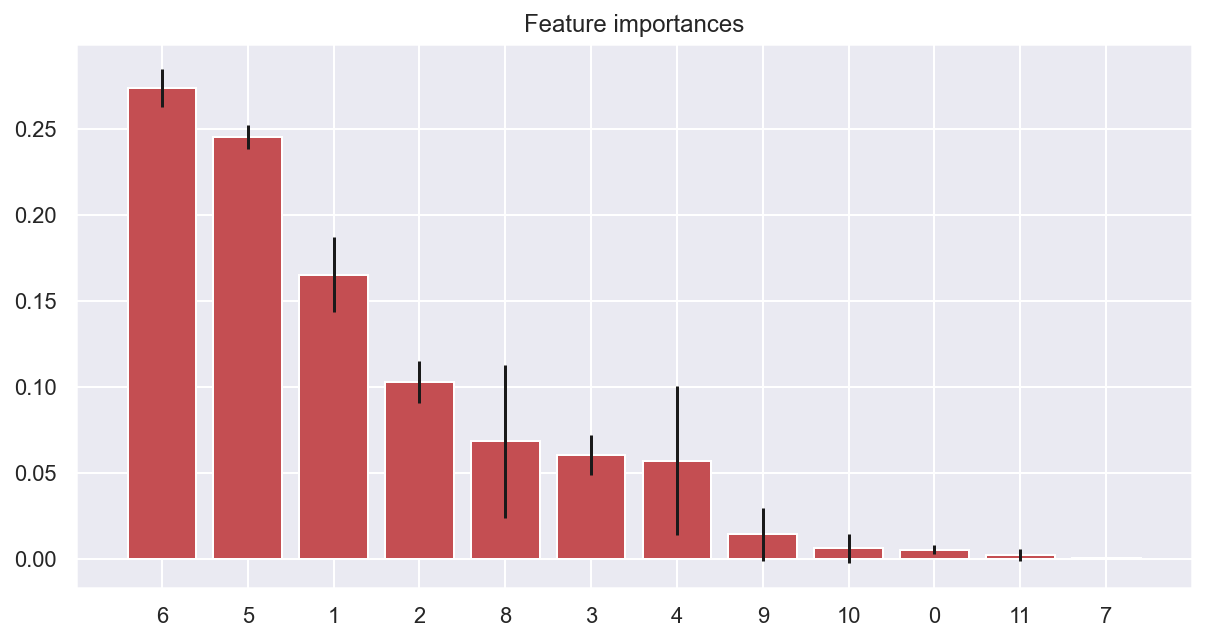

In [33]:
importances = forest.feature_importances_
std = np.std( [tree.feature_importances_ for tree in forest.estimators_], axis=0 )
indices = np.argsort( importances )[::-1]

# print the feature ranking
df = pd.DataFrame()

print( 'Feature Ranking:\n' )
for i, j in zip( x_train_fselection,forest.feature_importances_ ):
    aux = pd.DataFrame( {'feature': i, 'importance': j}, index=[0] )
    df = pd.concat( [df, aux], axis=0 )
    
print( df.sort_values( 'importance', ascending=False ) ) 

# plot the impurity-based feature importances of the forest
plt.figure()
plt.title( 'Feature importances' )
plt.bar( range( x_train_fselection.shape[1] ), importances[indices], color='r', yerr=std[indices], align='center' )
plt.xticks( range(x_train_fselection.shape[1]), indices )
plt.xlim( [-1, x_train_fselection.shape[1]] )
plt.show()

# 7.0. MACHINE LEARNING

In [34]:
selected_cols = [ 'vintage', 'annual_premium', 'age', 'region_code', 'vehicle_damage',
                  'policy_sales_channel', 'previously_insured' ]

x_train = df5[ selected_cols ]
x_val = x_val[ selected_cols ]

## 7.1. KNN model

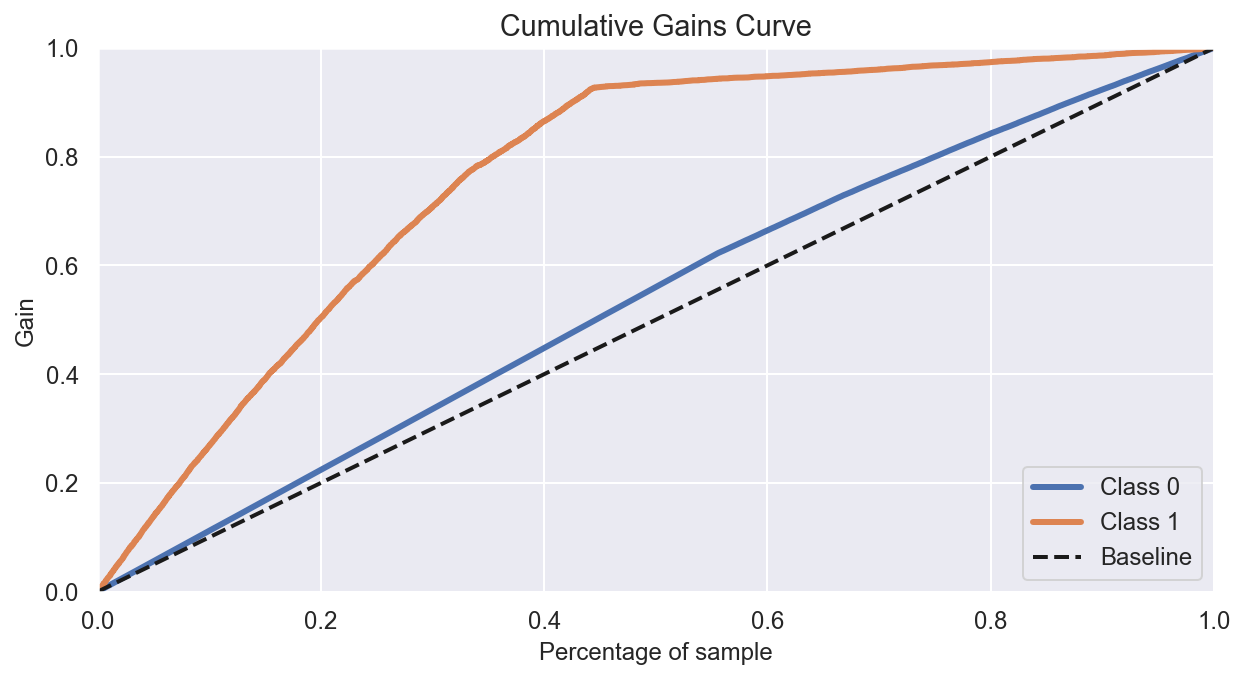

In [35]:
# model
knn_model = nh.KNeighborsClassifier( n_neighbors=10 )

# model training
knn_model.fit( x_train, y_train )

# prediction
yhat_knn = knn_model.predict_proba( x_val )

# cumulative gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_knn );

## 7.2. Logistic Regression

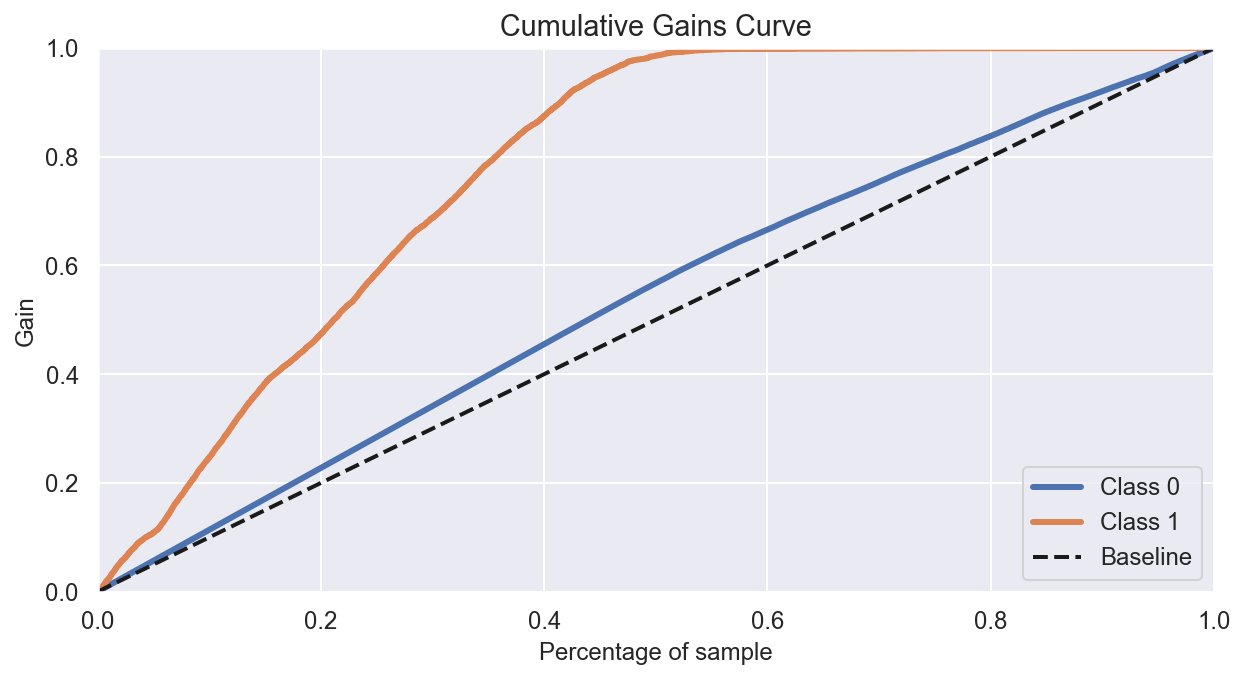

In [36]:
# model
lr = lm.LogisticRegression( random_state=42 )

# model training
lr.fit( x_train, y_train )

# prediction
yhat_lr = lr.predict_proba( x_val )

# cumulative gain
skplt.metrics.plot_cumulative_gain( y_val, yhat_lr );